In [93]:
!pip install scikit-learn
!pip install --upgrade pixiedust
!pip install brunel

import pixiedust
import sklearn
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_70d28272f6ab4204827ed510894c5cb2 = 'https://s3-api.us-geo.objectstorage.softlayer.net'
else:
    endpoint_70d28272f6ab4204827ed510894c5cb2 = 'https://s3-api.us-geo.objectstorage.service.networklayer.com'

client_70d28272f6ab4204827ed510894c5cb2 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Bz6qlsXBIUNuParhn47QYIl-rpdRYR69gUX07hauiRzX',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_70d28272f6ab4204827ed510894c5cb2)

body = client_70d28272f6ab4204827ed510894c5cb2.get_object(Bucket='bank-donotdelete-pr-hdxmvg35fiezu0',Key='IBM Project.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_5 = pd.read_csv(body)
df_data_5.head()
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.io import arff 
import brunel 

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Requirement already up-to-date: pixiedust in /opt/conda/envs/Python-3.7-main/lib/python3.7/site-pack

In [94]:
raw_df=df_data_5

In [95]:
raw_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [96]:
raw_df.shape

(499, 16)

In [97]:
raw_df.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

In [98]:
raw_df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

Text(0.5, 1.0, 'target variable')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


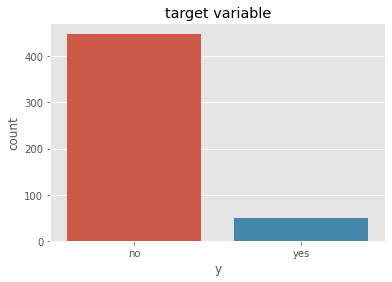

In [99]:
sns.countplot(raw_df["y"])
plt.title("target variable")

In [100]:
# indentifying the categorical variables
cat_var= raw_df.select_dtypes(include= ["object"]).columns
print(cat_var)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


In [101]:
# replacing "unknown" with the mode
for column in cat_var:
    mode= raw_df[column].mode()[0]
    raw_df[column]= raw_df[column].replace("unknown", mode)


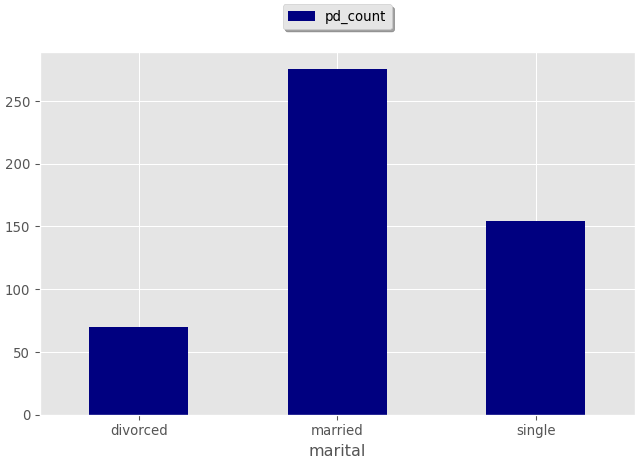

In [102]:
display(raw_df)

In [30]:
# indentifying the numerical variables
num_var= raw_df.select_dtypes(include=np.number)
num_var.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

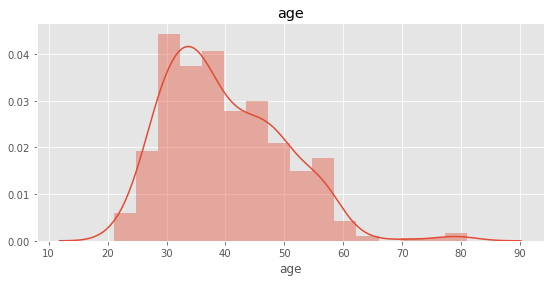

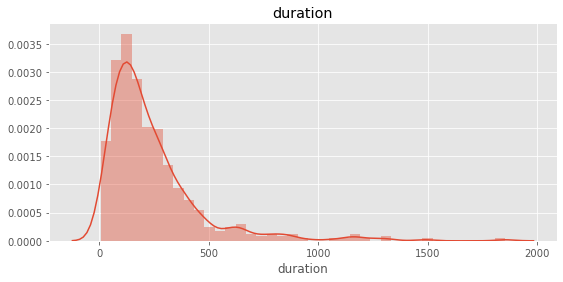

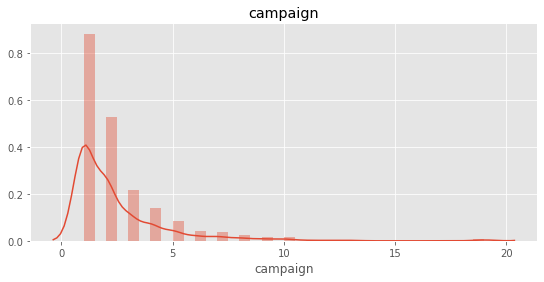

In [31]:
# plotting histogram for each numerical variable
plt.style.use("ggplot")
for column in ["age", "duration", "campaign"]:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.distplot(raw_df[column], kde=True)
    plt.title(column)

In [32]:
raw_df.drop(columns=["pdays", "previous"], axis=1, inplace=True)

In [34]:
raw_df.describe()

,age,duration,campaign
count,499.000000,499.000000,499.000000
mean,39.807615,241.817635,2.424850
std,9.978846,227.685193,2.216193
min,21.000000,6.000000,1.000000
25%,32.000000,106.500000,1.000000
50%,38.000000,179.000000,2.000000
75%,47.000000,297.000000,3.000000
max,81.000000,1855.000000,19.000000


In [35]:
# compute interquantile range to calculate the boundaries
lower_boundries= []
upper_boundries= []
for i in ["age", "duration", "campaign"]:
    IQR= raw_df[i].quantile(0.75) - raw_df[i].quantile(0.25)
    lower_bound= raw_df[i].quantile(0.25) - (1.5*IQR)
    upper_bound= raw_df[i].quantile(0.75) + (1.5*IQR)
    
    print(i, ":", lower_bound, ",",  upper_bound)
    
    lower_boundries.append(lower_bound)
    upper_boundries.append(upper_bound)

age : 9.5 , 69.5
duration : -179.25 , 582.75
campaign : -2.0 , 6.0


In [39]:
# replace the all the outliers which is greater then upper boundary by upper boundary
j = 0
for i in ["age", "duration", "campaign"]:
    raw_df.loc[raw_df[i] > upper_boundries[j], i] = int(upper_boundries[j])
    j = j + 1  

In [40]:
raw_df.describe()

,age,duration,campaign
count,499.000000,499.000000,499.000000
mean,39.723447,220.306613,2.238477
std,9.685811,155.283741,1.541020
min,21.000000,6.000000,1.000000
25%,32.000000,106.500000,1.000000
50%,38.000000,179.000000,2.000000
75%,47.000000,297.000000,3.000000
max,69.000000,582.000000,6.000000


In [41]:
# check categorical class
for i in cat_var:
    print(i, ":", raw_df[i].unique())

job : ['blue-collar' 'entrepreneur' 'retired' 'admin.' 'student' 'services'
 'technician' 'self-employed' 'management' 'unemployed' 'housemaid']
marital : ['married' 'divorced' 'single']
education : ['basic.9y' 'university.degree' 'basic.4y' 'high.school'
 'professional.course' 'basic.6y']
default : ['no']
housing : ['no' 'yes']
loan : ['no' 'yes']
contact : ['cellular' 'telephone']
month : ['nov' 'jul' 'may' 'jun' 'aug' 'mar' 'oct' 'apr' 'sep' 'dec']
day_of_week : ['wed' 'mon' 'tue' 'fri' 'thu']
poutcome : ['nonexistent' 'failure' 'success']
y : ['no' 'yes']


In [45]:
# initializing label encoder
le= LabelEncoder()

# iterating through each categorical feature and label encoding them
for feature in cat_var:
    raw_df[feature]= le.fit_transform(raw_df[feature])
    
raw_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,1,1,2,0,0,0,0,7,4,227,4,1,0
1,37,2,1,5,0,0,0,1,7,4,202,2,0,0
2,69,5,1,0,0,0,0,0,3,1,582,1,1,1
3,36,0,1,5,0,1,0,1,6,1,120,2,1,0
4,59,5,0,5,0,0,0,0,4,3,368,2,1,0


In [84]:
#split data into x and y variables

xvar=raw_df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome','age', 'duration', 'campaign']]
yvar=raw_df['y']

In [85]:
x_train,x_test,y_train,y_test=train_test_split(xvar,yvar,test_size=0.2)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(399, 13) (399,)
(100, 13) (100,)


In [86]:
modeltrain=RandomForestClassifier(n_jobs=2,random_state=0)
modeltrain.fit(x_train,y_train)

RandomForestClassifier(n_jobs=2, random_state=0)

In [88]:
#confusion matrix
#confusion_matrix(y_test,predop)

predop=modeltrain.predict(x_test)
pd.crosstab(y_test,predop,rownames=['ACTUAL RESULT'],colnames=['PREDICTED RESULT'])

PREDICTED RESULT,0,1
ACTUAL RESULT,,
0,89,2
1,9,0


In [90]:
acc=accuracy_score(y_test,predop)
acc

0.89